**Run the following two cells before you begin.**

In [1]:
%autosave 10

Autosaving every 10 seconds


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv('cleaned_data.csv')

**Run the following 3 cells to create a list of features, create a train/test split, and instantiate a random forest classifier.**

In [3]:
features_response = df.columns.tolist()
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university']
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df[features_response[:-1]].values,
    df['default payment next month'].values,
    test_size=0.2, random_state=24
)

In [5]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=10, criterion='gini', max_depth=3,
    min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
    max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
    min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None,
    random_state=4, verbose=0, warm_start=False, class_weight=None
)

**Create a dictionary representing the grid for the `max_depth` and `n_estimators` hyperparameters that will be searched. Include depths of 3, 6, 9, and 12, and 10, 50, 100, and 200 trees.**

In [22]:
params = {'max_depth':[3,9,12,10,50,100,200],'n_estimators':[10,50,100,200]}

________________________________________________________________
**Instantiate a `GridSearchCV` object using the same options that we have previously in this course, but with the dictionary of hyperparameters created above. Set `verbose=2` to see the output for each fit performed.**

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn import tree
cv = GridSearchCV(rf, param_grid=params,scoring='roc_auc',
                  n_jobs=-1, iid=False, refit=True, cv=4, verbose=2, error_score=np.nan, return_train_score=True)


____________________________________________________
**Fit the `GridSearchCV` object on the training data.**

In [30]:
cv.fit(X_train, y_train)

Fitting 4 folds for each of 28 candidates, totalling 112 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   36.7s
[Parallel(n_jobs=-1)]: Done 112 out of 112 | elapsed:  3.3min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=4,
                                              verbose=0, warm_start=False),
             iid=False, n_jobs=-1,
             param_grid={'max_depth': [3, 9, 12, 10, 

___________________________________________________________
**Put the results of the grid search in a pandas DataFrame.**

In [31]:
cv_results_df = pd.DataFrame(cv.cv_results_)
cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.363634,0.081077,0.034240,0.016355,3,10,"{'max_depth': 3, 'n_estimators': 10}",0.773109,0.766194,0.759475,0.743870,0.760662,0.010827,18,0.760652,0.763199,0.770383,0.768790,0.765756,3.975080e-03
1,1.265345,0.010032,0.068728,0.012790,3,50,"{'max_depth': 3, 'n_estimators': 50}",0.776417,0.774413,0.758292,0.748397,0.764380,0.011598,13,0.769038,0.767107,0.774445,0.776093,0.771671,3.708698e-03
2,2.490455,0.072374,0.098219,0.027617,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.775328,0.775094,0.758278,0.749097,0.764449,0.011241,12,0.768155,0.768331,0.773938,0.775587,0.771503,3.312129e-03
3,4.617527,0.096493,0.176693,0.018345,3,200,"{'max_depth': 3, 'n_estimators': 200}",0.775546,0.773983,0.758675,0.750389,0.764648,0.010547,11,0.768853,0.768023,0.773623,0.776227,0.771681,3.384419e-03
4,0.578065,0.016763,0.026492,0.012274,9,10,"{'max_depth': 9, 'n_estimators': 10}",0.780155,0.770939,0.763128,0.751761,0.766496,0.010426,10,0.841328,0.846406,0.856082,0.848704,0.848130,5.310606e-03
5,2.667898,0.044843,0.066481,0.001118,9,50,"{'max_depth': 9, 'n_estimators': 50}",0.789091,0.784664,0.769314,0.763039,0.776527,0.010701,6,0.858836,0.866019,0.869223,0.867517,0.865399,3.954733e-03
6,5.839136,0.051249,0.125210,0.000829,9,100,"{'max_depth': 9, 'n_estimators': 100}",0.790593,0.786058,0.771647,0.764219,0.778129,0.010650,3,0.860308,0.868584,0.871058,0.869815,0.867441,4.210142e-03
7,10.991994,0.094830,0.279662,0.014749,9,200,"{'max_depth': 9, 'n_estimators': 200}",0.791313,0.786984,0.774450,0.763902,0.779162,0.010769,1,0.861790,0.868840,0.871868,0.870697,0.868299,3.909631e-03
8,0.776500,0.040004,0.021244,0.000829,12,10,"{'max_depth': 12, 'n_estimators': 10}",0.773111,0.762049,0.744532,0.736969,0.754165,0.014227,25,0.915965,0.923355,0.920788,0.923045,0.920788,2.955657e-03
9,3.456146,0.025638,0.087973,0.012016,12,50,"{'max_depth': 12, 'n_estimators': 50}",0.787161,0.781517,0.764827,0.753437,0.771735,0.013381,9,0.935475,0.943611,0.939708,0.941929,0.940181,3.049242e-03


**Find the best hyperparameters from the cross-validation.**

In [32]:
cv.best_params_


{'max_depth': 9, 'n_estimators': 200}

________________________________________________________________________________________________________
**Create a `pcolormesh` visualization of the mean testing score for each combination of hyperparameters.**

<details>
    <summary>Hint:</summary>
    Remember to reshape the values of the mean testing scores to be a two-dimensional 4x4 grid.
</details>

In [36]:
# Create a 5x5 grid
xx_example, yy_example = np.meshgrid(range(5), range(5))
z_example = np.arange(1,26).reshape(5,5)
z_example

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25]])

Text(0, 0.5, 'Y coordinate')

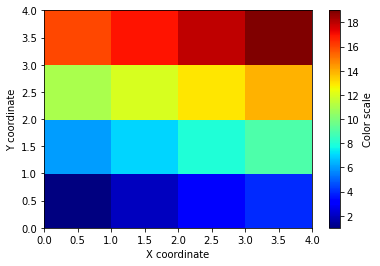

In [37]:
# Set color map to `plt.cm.jet`
ax = plt.axes()
pcolor_ex = ax.pcolormesh(xx_example, yy_example, z_example, cmap=plt.cm.jet)
plt.colorbar(pcolor_ex, label='Color scale')
ax.set_xlabel('X coordinate')
ax.set_ylabel('Y coordinate')

In [ ]:
# Visualize pcolormesh


________________________________________________________________________________________________________
**Conclude which set of hyperparameters to use.**

In [38]:
# Create a dataframe of the feature names and importance
data_act=pd.DataFrame({'Feature name':features_response[:-1],'Importance':cv.best_estimator_.feature_importances_})

In [39]:
# Sort values by importance
data_act.sort_values('Importance',ascending=False)

,Feature name,Importance
4,PAY_1,0.447904
0,LIMIT_BAL,0.056136
11,PAY_AMT1,0.055068
12,PAY_AMT2,0.048117
5,BILL_AMT1,0.041400
13,PAY_AMT3,0.040539
6,BILL_AMT2,0.038919
7,BILL_AMT3,0.036369
14,PAY_AMT4,0.032750
8,BILL_AMT4,0.032443
